In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

In [6]:
def readNPZData(filename):
    # Use pandas to read in the csv file
    dateparse = lambda x: pd.datetime.strptime(str(x), '%m/%d/%Y')
    data_df = pd.read_csv(filename, parse_dates=['Date'], date_parser=dateparse)
    return data_df

data = readNPZData("NPZData.csv")
NH4 = data['NH4']
NO3 = data['NO3']
P = data['Chl.Ave']
Z = data['Total.Zoo']
date = data['Date']

In [9]:
# Convert all measurements to micrgrams carbon per liter
# For nitrate measures as micromolar, multiply by 12*106/16
# For chlorophyll a, multiply by 40 (gC per g of Chl)
# For zooplankton, multiply by 6*1e-3
# Create empty vectors for the scaled values _S
NO3_S = []
NH4_S = []
P_S = []
Z_S = []
TZ_S = []
for t in range(0,len(NO3)):
    S = NO3[t]*12*106/16
    NO3_S.append(S)
    S = NH4[t]*12*106/16
    NH4_S.append(S)
    P_S.append(P[t]*40)
    Z_S.append(Z[t]*6*0.001)
  
print (len(P))

87


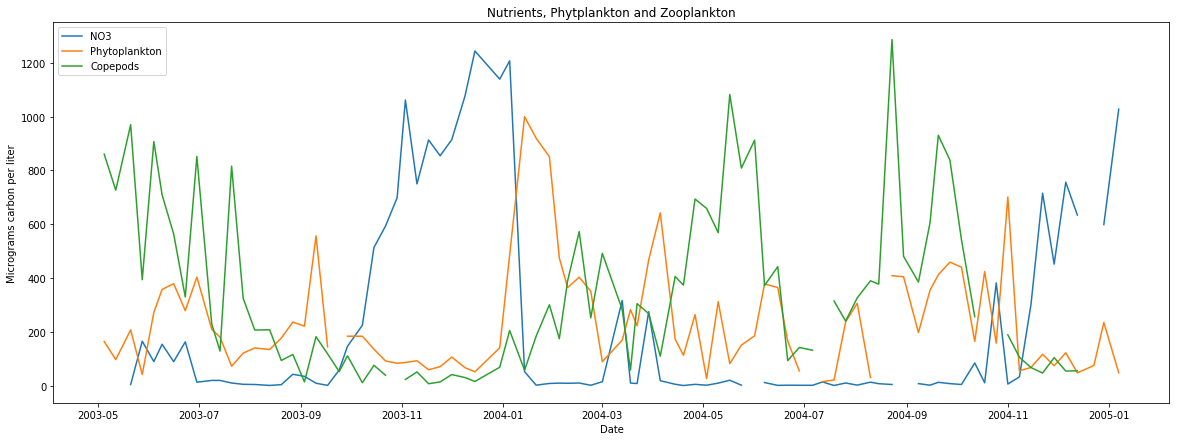

In [10]:
plt.subplots(figsize=(20, 7))
#plt.plot(date, NH4_S, label='NH4')
plt.plot(date, NO3_S, label='NO3')
plt.plot(date, P_S, label='Phytoplankton')
plt.plot(date, Z_S, label='Copepods')
#plt.plot(date, TZ_S, label='Total Zooplankton')
plt.ylabel('Micrograms carbon per liter')
plt.xlabel('Date')
plt.title('Nutrients, Phytplankton and Zooplankton')
plt.legend(loc='upper left')
plt.show()